# Центральная Предельная Теорема Своими Руками

In [113]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline


#### Возьмем распределение хи-квадрат и сгенерируем выборку

http://bit.ly/2lZlg9S

Мат. ожидание = k

Дисперсия = 2*k

In [114]:
k = 10
dist = sts.chi2(k)
samples = dist.rvs(size=1000)

#### Построим гистограмму выборки и теоритическое распределение

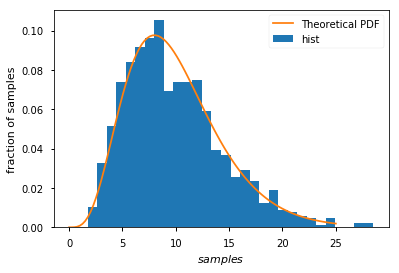

In [115]:
plt.hist(samples, 30, normed=True, label='hist')
plt.ylabel('fraction of samples')
plt.xlabel('$samples$')

x = np.linspace(0,25,100)
pdf = dist.pdf(x)
plt.plot(x, pdf, label='Theoretical PDF')

plt.legend()

#### Функция которая сгеренирует выборку из средних и постоит гистограмму и теоритическую плотность нормального распределения, которым приближаем:

По ЦПТ: $N(EX,\frac{DX}{n})$ - нормальное распределение, аппроксимирующее распределение выборочных средних -> $ N(k, \frac{2k}{n})$

In [116]:
def build_distributon(n, dist):
    means = []
    for i in range(1000):
        s = dist.rvs(n)
        means.append(np.mean(s))
    
    
    plt.hist(means, bins = 20, label='hist n=' + str(n), normed = True) # гистограмма
    
    x = np.linspace(0, 25, 100)
    norm_rv = sts.norm(dist.mean(), np.sqrt(dist.var() / float(n)))  
    pdf = norm_rv.pdf(x) # теоритическая плотность вероятности
    plt.plot(x, pdf, label='theoretical pdf')
    plt.legend()
    plt.ylabel('$fraction of samples$')
    plt.xlabel('$samples$')
    plt.show()

#### Построим 5 графиков чтобы увидеть действие ЦПТ

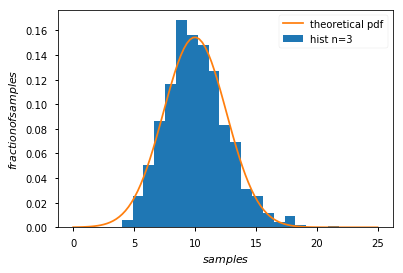

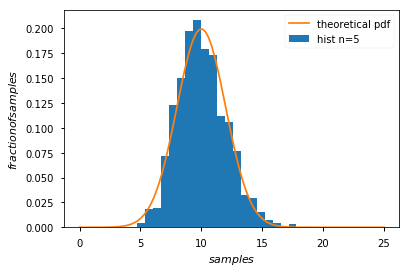

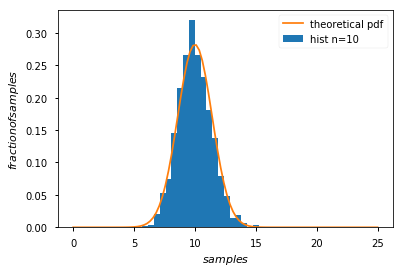

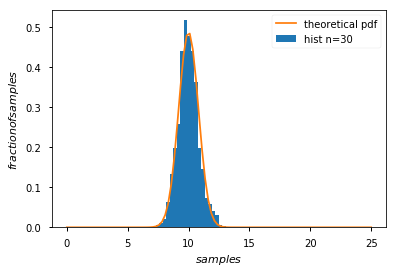

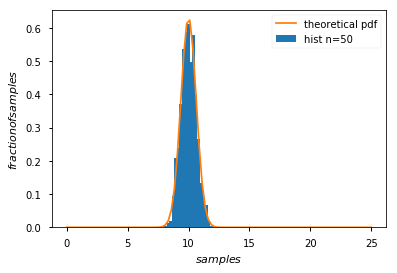

In [117]:
for n in [3,5,10,30,50]:
    build_distributon(n, dist)

#### Вывод: 
Как и предсказывает ЦПТ, нормальным распределением можно приблизить выборку средних почти для любого распределения. Как мы видим на последних четырех графиках, с увеличением объема выборки значения концентрируются вокруг среднего, гистограмма становится вытянутой, сконцентрированной возле среднего значения k из изначального распределения.